In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Carga de Base de Datos

In [3]:
df_serbach_18 = pd.read_csv('../DATOS/base_ser_bachiller_2018.csv',delimiter=';')
df_serbach_18

C:\Users\nicole.gaibor\AppData\Local\Temp\ipykernel_5856\504399977.py:1: DtypeWarning: Columns (2,22,24,25,26,27) have mixed types. Specify dtype option on import or set low_memory=False.
  df_serbach_18 = pd.read_csv('../DATOS/base_ser_bachiller_2018.csv',delimiter=';')


,codigo,ciclo,amie,nm_regi,es_regeva,id_zona,id_dist,id_circ,id_prov,id_cant,...,imat,ilyl,icn,ies,nl_inev,nl_imat,nl_ilyl,nl_icn,nl_ies,deshonestidad
0,NQP5X0D9ZJ,2018-2019,01B00020,2,2,6,01D02,01D02C12,1,101,...,"7,35","7,69","7,46","7,69",1,1,1,1,1,2
1,G1FZ4Q9CHI,2018-2019,01B00020,2,2,6,01D02,01D02C12,1,101,...,7,"8,04","8,38","6,57",1,1,2,2,0,2
2,0JVAJN4VHY,2018-2019,01B00020,2,2,6,01D02,01D02C12,1,101,...,"6,14","6,14","5,71","5,71",0,0,0,0,0,2
3,XCVRMB62E2,2018-2019,01B00020,2,2,6,01D02,01D02C12,1,101,...,"7,92","7,92","8,85","7,46",2,1,1,2,1,2
4,U26A1490WL,2018-2019,01B00030,2,2,6,01D01,01D01C17,1,101,...,"8,15","7,69","7,69","7,92",1,2,1,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
514847,1IT32RMBVN,2018-2019,999999,2,2,6,01D02,01D02C07,1,101,...,999999,999999,999999,999999,999999,999999,999999,999999,999999,2
514848,JB5C926964,2018-2019,999999,2,1,6,01D08,01D08C01,1,109,...,999999,999999,999999,999999,999999,999999,999999,999999,999999,2
514849,SL9WE26964,2018-2019,999999,2,1,9,17D06,17D06C08,17,1701,...,999999,999999,999999,999999,999999,999999,999999,999999,999999,2
514850,ECT50N1P5W,2018-2019,999999,2,2,9,17D06,17D06C08,17,1701,...,999999,999999,999999,999999,999999,999999,999999,999999,999999,2


In [4]:
# Filtrando para mantener unicamente la informacion de estudiantes evaluados afiliados a 
# una institucion educativa y que no hayan cometido deshonestidad académica en todos los periodos

df_ineval_18 = df_serbach_18[((df_serbach_18['poblacion']==1)
                            &(df_serbach_18['deshonestidad']==2)
                            &(df_serbach_18['estado']==2))]

print(len(df_ineval_18))

299750


In [5]:
# Identificando número de instituciones en la base de datos 

df_inst_18 = df_serbach_18.drop_duplicates(['amie'])

print('2018:', len(df_inst_18))

2018: 3660


# Limpieza y tratamiento de la base de datos

In [6]:
#Se procede a transformar las variables financiamiento, tp_sost, tp_sexo, tp_area, quintil y población al formato de categoricas
categoricas = ['financiamiento','tp_sost','tp_sexo','tp_area','quintil','poblacion','nm_regi','nl_inev']

for col in categoricas:
    df_ineval_18[col] = df_ineval_18[col].astype('category')

df_ineval_18.dtypes

C:\Users\nicole.gaibor\AppData\Local\Temp\ipykernel_5856\4212787860.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ineval_18[col] = df_ineval_18[col].astype('category')


codigo              object
ciclo               object
amie                object
nm_regi           category
es_regeva            int64
id_zona              int64
id_dist             object
id_circ             object
id_prov              int64
id_cant              int64
id_parr              int64
financiamiento    category
tp_sost           category
tp_sexo           category
na_eano              int64
tp_area           category
etnibbe              int64
discapacidad         int64
quintil           category
poblacion         category
estado               int64
isec                object
inev                object
pes                  int64
imat                object
ilyl                object
icn                 object
ies                 object
nl_inev           category
nl_imat              int64
nl_ilyl              int64
nl_icn               int64
nl_ies               int64
deshonestidad        int64
dtype: object

In [7]:
#La variable isec es el nivel socioeconómico del sustentante, por lo cual se verifica que tipo de datos existen
df_ineval_18.isec

0              ,86847
1            -1,14563
2              ,21734
3            -1,35133
4             1,60637
             ...     
302684     ,142527549
302685    -,446443506
302686    -1,10926745
302687     -1,3396075
302688     ,213561479
Name: isec, Length: 299750, dtype: object

In [8]:
#La variable isec, al ser cargada como objeto, existen datos como ',87659' que en realidad representa '0.87659', por lo cual se procede a transformar para que no genere inconvenientes
#al momento de realizar otros análisis

def limpiar_y_convertir(valor):
    if pd.isna(valor):
        return None
    valor = str(valor)
    if valor.startswith(','):
        valor = '0.' + valor[1:]
    else:
        valor = valor.replace(',', '.')
    return pd.to_numeric(valor, errors='coerce')

# Aplicar la función a la columna
df_ineval_18['isec'] = df_ineval_18['isec'].apply(limpiar_y_convertir)

# Asegurarse de que no hay valores nulos en 'isec' después de la conversión
df_escolares = df_ineval_18.dropna(subset=['isec'])

print(df_escolares.isec)

0         0.868470
1        -1.145630
2         0.217340
3        -1.351330
4         1.606370
            ...   
302684    0.142528
302685   -0.446444
302686   -1.109267
302687   -1.339608
302688    0.213561
Name: isec, Length: 299750, dtype: float64


C:\Users\nicole.gaibor\AppData\Local\Temp\ipykernel_5856\3680719841.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ineval_18['isec'] = df_ineval_18['isec'].apply(limpiar_y_convertir)


In [9]:
# Etiquetado de variables categóricas
mapeo_regiones = {1: 'Costa', 2: 'Sierra', 3: 'Oriente', 4:'Insular', 90:'Zona no delimitada', 98:'Exterior'}
mapeo_finan = {1: 'Particular', 2: 'Municipal', 3: 'Fiscomisional', 4:'Fiscal'}
mapeo_sexo = {1: 'Hombre', 2: 'Mujer'}
mapeo_area = {1: 'Rural', 2: 'Urbano', 98:'Exterior'}
mapeo_nivel = {0: 'Insuficiente', 1: 'Elemental', 2:'Satisfactorio', 3:'Excelente', 999999:'No dio la prueba'}

# Asignar las etiquetas utilizando el método map
df_ineval_18['region'] = df_ineval_18['nm_regi'].map(mapeo_regiones)
df_ineval_18['tipo_finan'] = df_ineval_18['tp_sost'].map(mapeo_finan)
df_ineval_18['tipo_sexo'] = df_ineval_18['tp_sexo'].map(mapeo_sexo)
df_ineval_18['tipo_area'] = df_ineval_18['tp_area'].map(mapeo_area)
df_ineval_18['nivel_alcanzado'] = df_ineval_18['nl_inev'].map(mapeo_nivel)

C:\Users\nicole.gaibor\AppData\Local\Temp\ipykernel_5856\1925725455.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ineval_18['region'] = df_ineval_18['nm_regi'].map(mapeo_regiones)
C:\Users\nicole.gaibor\AppData\Local\Temp\ipykernel_5856\1925725455.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ineval_18['tipo_finan'] = df_ineval_18['tp_sost'].map(mapeo_finan)
C:\Users\nicole.gaibor\AppData\Local\Temp\ipykernel_5856\1925725455.py:11: SettingWithCopyWarning: 
A value is trying to be set on a

In [10]:
#Se identifica el máximo valor del isec para ver si existen outliers
print(df_ineval_18['isec'].max())

999999.0


In [14]:
df_ineval_18['inev'] = df_ineval_18['inev'].str.replace(',', '.').astype(float)
df_ineval_18['inev']

C:\Users\nicole.gaibor\AppData\Local\Temp\ipykernel_5856\3566898505.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ineval_18['inev'] = df_ineval_18['inev'].str.replace(',', '.').astype(float)


0         7.55
1         7.50
2         5.93
3         8.04
4         7.86
          ... 
302684    5.82
302685    6.47
302686    7.23
302687    6.92
302688    7.07
Name: inev, Length: 299750, dtype: float64

In [15]:
# Se elimina los outliers en isec para mejor análisis
df_ineval = df_ineval_18[df_ineval_18['isec']!=999999]
df_ineval

,codigo,ciclo,amie,nm_regi,es_regeva,id_zona,id_dist,id_circ,id_prov,id_cant,...,nl_imat,nl_ilyl,nl_icn,nl_ies,deshonestidad,region,tipo_finan,tipo_sexo,tipo_area,nivel_alcanzado
0,NQP5X0D9ZJ,2018-2019,01B00020,2,2,6,01D02,01D02C12,1,101,...,1,1,1,1,2,Sierra,Fiscal,Hombre,Rural,Elemental
1,G1FZ4Q9CHI,2018-2019,01B00020,2,2,6,01D02,01D02C12,1,101,...,1,2,2,0,2,Sierra,Fiscal,Hombre,Rural,Elemental
2,0JVAJN4VHY,2018-2019,01B00020,2,2,6,01D02,01D02C12,1,101,...,0,0,0,0,2,Sierra,Fiscal,Hombre,Rural,Insuficiente
3,XCVRMB62E2,2018-2019,01B00020,2,2,6,01D02,01D02C12,1,101,...,1,1,2,1,2,Sierra,Fiscal,Hombre,Rural,Satisfactorio
4,U26A1490WL,2018-2019,01B00030,2,2,6,01D01,01D01C17,1,101,...,2,1,1,1,2,Sierra,Particular,Mujer,Rural,Elemental
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
302684,93JQW16738,2018-2019,24H00414,1,1,5,24D01,24D01C04,24,2401,...,0,1,0,0,2,Costa,Fiscomisional,Hombre,Urbano,Insuficiente
302685,KR4AA18822,2018-2019,24H00414,1,1,5,24D01,24D01C04,24,2401,...,0,1,1,0,2,Costa,Fiscomisional,Hombre,Urbano,Insuficiente
302686,NH82D23826,2018-2019,24H00414,1,1,5,24D01,24D01C04,24,2401,...,1,2,1,0,2,Costa,Fiscomisional,Hombre,Urbano,Elemental
302687,ALWJF25514,2018-2019,24H00414,1,1,5,24D01,24D01C04,24,2401,...,1,0,1,0,2,Costa,Fiscomisional,Hombre,Urbano,Insuficiente


In [16]:
# Se procede a transformar las variables de nivel de logro por materia 
# al formato de categoricas
categoricas_nl = ['nl_imat','nl_ilyl','nl_icn','nl_ies']

for col in categoricas_nl:
    df_ineval[col] = df_ineval[col].astype('category')

df_ineval.dtypes

C:\Users\nicole.gaibor\AppData\Local\Temp\ipykernel_5856\851311818.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ineval[col] = df_ineval[col].astype('category')


codigo               object
ciclo                object
amie                 object
nm_regi            category
es_regeva             int64
id_zona               int64
id_dist              object
id_circ              object
id_prov               int64
id_cant               int64
id_parr               int64
financiamiento     category
tp_sost            category
tp_sexo            category
na_eano               int64
tp_area            category
etnibbe               int64
discapacidad          int64
quintil            category
poblacion          category
estado                int64
isec                float64
inev                float64
pes                   int64
imat                 object
ilyl                 object
icn                  object
ies                  object
nl_inev            category
nl_imat            category
nl_ilyl            category
nl_icn             category
nl_ies             category
deshonestidad         int64
region             category
tipo_finan         c

In [17]:
# Asignar las etiquetas por los niveles de logro
df_ineval['nivel_mat'] = df_ineval['nl_imat'].map(mapeo_nivel)
df_ineval['nivel_lengua'] = df_ineval['nl_ilyl'].map(mapeo_nivel)
df_ineval['nivel_ciencias'] = df_ineval['nl_icn'].map(mapeo_nivel)
df_ineval['nivel_social'] = df_ineval['nl_ies'].map(mapeo_nivel)
df_ineval

C:\Users\nicole.gaibor\AppData\Local\Temp\ipykernel_5856\3264851434.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ineval['nivel_mat'] = df_ineval['nl_imat'].map(mapeo_nivel)
C:\Users\nicole.gaibor\AppData\Local\Temp\ipykernel_5856\3264851434.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ineval['nivel_lengua'] = df_ineval['nl_ilyl'].map(mapeo_nivel)
C:\Users\nicole.gaibor\AppData\Local\Temp\ipykernel_5856\3264851434.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a s

,codigo,ciclo,amie,nm_regi,es_regeva,id_zona,id_dist,id_circ,id_prov,id_cant,...,deshonestidad,region,tipo_finan,tipo_sexo,tipo_area,nivel_alcanzado,nivel_mat,nivel_lengua,nivel_ciencias,nivel_social
0,NQP5X0D9ZJ,2018-2019,01B00020,2,2,6,01D02,01D02C12,1,101,...,2,Sierra,Fiscal,Hombre,Rural,Elemental,Elemental,Elemental,Elemental,Elemental
1,G1FZ4Q9CHI,2018-2019,01B00020,2,2,6,01D02,01D02C12,1,101,...,2,Sierra,Fiscal,Hombre,Rural,Elemental,Elemental,Satisfactorio,Satisfactorio,Insuficiente
2,0JVAJN4VHY,2018-2019,01B00020,2,2,6,01D02,01D02C12,1,101,...,2,Sierra,Fiscal,Hombre,Rural,Insuficiente,Insuficiente,Insuficiente,Insuficiente,Insuficiente
3,XCVRMB62E2,2018-2019,01B00020,2,2,6,01D02,01D02C12,1,101,...,2,Sierra,Fiscal,Hombre,Rural,Satisfactorio,Elemental,Elemental,Satisfactorio,Elemental
4,U26A1490WL,2018-2019,01B00030,2,2,6,01D01,01D01C17,1,101,...,2,Sierra,Particular,Mujer,Rural,Elemental,Satisfactorio,Elemental,Elemental,Elemental
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
302684,93JQW16738,2018-2019,24H00414,1,1,5,24D01,24D01C04,24,2401,...,2,Costa,Fiscomisional,Hombre,Urbano,Insuficiente,Insuficiente,Elemental,Insuficiente,Insuficiente
302685,KR4AA18822,2018-2019,24H00414,1,1,5,24D01,24D01C04,24,2401,...,2,Costa,Fiscomisional,Hombre,Urbano,Insuficiente,Insuficiente,Elemental,Elemental,Insuficiente
302686,NH82D23826,2018-2019,24H00414,1,1,5,24D01,24D01C04,24,2401,...,2,Costa,Fiscomisional,Hombre,Urbano,Elemental,Elemental,Satisfactorio,Elemental,Insuficiente
302687,ALWJF25514,2018-2019,24H00414,1,1,5,24D01,24D01C04,24,2401,...,2,Costa,Fiscomisional,Hombre,Urbano,Insuficiente,Elemental,Insuficiente,Elemental,Insuficiente


# Análisis Descriptivo de las variables

In [18]:
# Medidas de tendencia central y dispersion de la nota obtenida en el examen de grado
# obtenido por los sustentantes escolares 
print(df_ineval[['inev']].describe())

                inev
count  297597.000000
mean        7.704808
std         0.862586
min         4.000000
25%         7.070000
50%         7.640000
75%         8.300000
max        10.000000


In [19]:
# Promedio en el puntaje obtenido por sexo según el área en el que se encuentran ubicados
print(df_ineval.groupby(['tipo_area','tipo_sexo'])['inev'].mean())

tipo_area  tipo_sexo
Rural      Hombre       7.685794
           Mujer        7.648220
Urbano     Hombre       7.742217
           Mujer        7.683225
Name: inev, dtype: float64


C:\Users\nicole.gaibor\AppData\Local\Temp\ipykernel_5856\2262097869.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df_ineval.groupby(['tipo_area','tipo_sexo'])['inev'].mean())


- Se puede observar que existe una diferencia de alrededor de 0.06 puntos en el promedio de la nota obtenida por los hombres en el área urbana con los hombres que residen en el área rural.
- La diferencia entre los puntajes obtenidos por las mujeres es menor (0.04 puntos).
- Cabe mencionar que, los hombres del área urbana pueden superar en solo 0.04 puntos al promedio global (7.70 puntos)

In [22]:
# Totales por region y quintil 
print(pd.crosstab(df_ineval['region'], df_ineval['quintil']))

quintil                 1      2      3      4      5
region                                               
Costa               34943  29974  28857  28197  30484
Sierra              24920  23936  23654  24748  29637
Oriente              6982   3828   2555   2211   1844
Insular                22     36     70    112    170
Zona no delimitada    162    112     86     40     17


- En la costa se localizan la mayoría de sustentantes que se encuentran en el quintil 1 (nivel socioeconómico más bajo).
- La mayoría de los sustentantes en la región insular pertenecen al quintil 5 (nivel socioeconómico más alto).
- El 38,84% de los sustentantes en zonas no delimitados son clasificados en el quintil 1. 

In [21]:
# Agrupación a nivel de estudiante y región
por_reg = df_ineval.groupby(['region'])['codigo'].count().reset_index()
por_reg['porcentaje'] = (por_reg['codigo']/por_reg['codigo'].sum())*100
por_reg

C:\Users\nicole.gaibor\AppData\Local\Temp\ipykernel_5856\3122559629.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  por_reg = df_ineval.groupby(['region'])['codigo'].count().reset_index()


,region,codigo,porcentaje
0,Costa,152455,51.228675
1,Sierra,126895,42.639879
2,Oriente,17420,5.853554
3,Insular,410,0.137770
4,Zona no delimitada,417,0.140122


- Más de la mitad de los sustentantes se localizan en la región Costa. 
- Alrededor del 90% de escolares residen en la región Costa y Sierra.

In [26]:
# Agrupación de número de instituciones y región
df_inst_18 = df_ineval.drop_duplicates(['amie'])
reg_inst = df_inst_18.groupby(['region'])['amie'].count().reset_index()
reg_inst['porcentaje'] = (reg_inst['amie']/reg_inst['amie'].sum())*100
reg_inst

C:\Users\nicole.gaibor\AppData\Local\Temp\ipykernel_5856\4199652846.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  reg_inst = df_inst_18.groupby(['region'])['amie'].count().reset_index()


,region,amie,porcentaje
0,Costa,1534,42.015886
1,Sierra,1742,47.712955
2,Oriente,360,9.860312
3,Insular,9,0.246508
4,Zona no delimitada,6,0.164339


- A pesar que la mayoría de los sustentantes se encuentran en la región Costa, la Sierra tiene un mayor número de instituciones educativas. 

In [27]:
# Agrupación de las instituciones educativas según su financiamiento
fin_inst = df_inst_18.groupby(['tipo_finan'])['amie'].count().reset_index()
fin_inst['porcentaje'] = (fin_inst['amie']/fin_inst['amie'].sum())*100
fin_inst

C:\Users\nicole.gaibor\AppData\Local\Temp\ipykernel_5856\376398446.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  fin_inst = df_inst_18.groupby(['tipo_finan'])['amie'].count().reset_index()


,tipo_finan,amie,porcentaje
0,Particular,1132,31.005204
1,Municipal,35,0.958641
2,Fiscomisional,330,9.038620
3,Fiscal,2154,58.997535


- A nivel nacional, en el periodo de 2018-2019, el 59,95% son de tipo público, es decir, financiadas por el estado. 

In [28]:
# Promedio en el puntaje obtenido por tipo de financiamiento de la institucion educativa
inev_finan = df_inst_18.groupby(['tipo_finan'])['inev'].mean().reset_index()
inev_finan['mediana_inev'] = df_inst_18.groupby(['tipo_finan'])['inev'].median().values
inev_finan

C:\Users\nicole.gaibor\AppData\Local\Temp\ipykernel_5856\1949493513.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  inev_finan = df_inst_18.groupby(['tipo_finan'])['inev'].mean().reset_index()
C:\Users\nicole.gaibor\AppData\Local\Temp\ipykernel_5856\1949493513.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  inev_finan['mediana_inev'] = df_inst_18.groupby(['tipo_finan'])['inev'].median().values


,tipo_finan,inev,mediana_inev
0,Particular,7.998604,8.01
1,Municipal,8.117429,8.10
2,Fiscomisional,7.666303,7.64
3,Fiscal,7.565218,7.52


In [29]:
promedio_nacional = df_inst_18['inev'].mean()
promedio_nacional

7.7140208162147355

In [31]:
por_nlinev = df_ineval.groupby(['nivel_alcanzado'])['codigo'].count().reset_index()
por_nlinev['porcentaje'] = ((por_nlinev['codigo']/por_nlinev['codigo'].sum())*100)
por_nlinev

C:\Users\nicole.gaibor\AppData\Local\Temp\ipykernel_5856\1365456179.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  por_nlinev = df_ineval.groupby(['nivel_alcanzado'])['codigo'].count().reset_index()


,nivel_alcanzado,codigo,porcentaje
0,Insuficiente,65378,21.968635
1,Elemental,127387,42.805203
2,Satisfactorio,98088,32.960010
3,Excelente,6744,2.266152


In [33]:
#Espeficiar columnas
columnas_materias = ['nl_imat','nl_ilyl','nl_icn','nl_ies']

# Tabla de porcentajes
tabla_porcentajes = pd.concat([df_inst_18[col].value_counts(normalize=True)*100 for col in columnas_materias], axis=1).fillna(0)

# Renombrar las columnas para que coincidan con las originales
tabla_porcentajes.columns = columnas_materias

tabla_porcentajes

,nl_imat,nl_ilyl,nl_icn,nl_ies
1,48.644207,42.591071,44.563133,47.795125
2,33.223774,40.071213,31.881676,29.937004
0,14.571350,14.324843,18.926322,18.433306
3,3.560668,3.012873,4.628869,3.834566


C:\Users\nicole.gaibor\AppData\Local\Temp\ipykernel_5856\1097817034.py:21: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


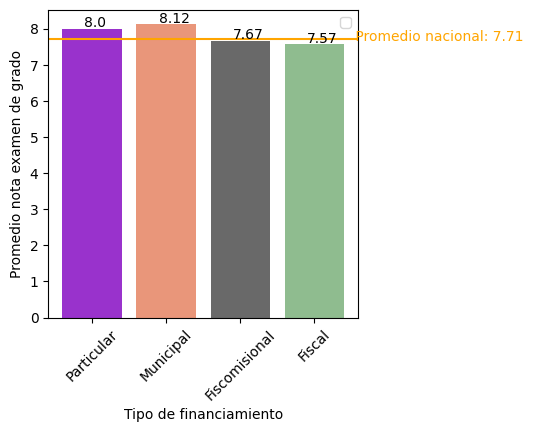

In [34]:
plt.figure(figsize=(4, 4))
bars = plt.bar(inev_finan['tipo_finan'], inev_finan['inev'], color=['darkorchid', 'darksalmon', 'dimgray','darkseagreen'])

# Línea del promedio nacional
plt.axhline(y=promedio_nacional, color='orange', linestyle='-')

# Añadir etiquetas de datos
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2 - 0.1, yval + 0.05, round(yval, 2))

# Añadir etiqueta al promedio nacional
plt.text(len(inev_finan['tipo_finan']) - 0.5, promedio_nacional + 0.05, 
         f' Promedio nacional: {round(promedio_nacional,2)}', color='orange', va='center')

# Añadir título y etiquetas
#plt.title('Comparación de promedios nota examen de grado, por tipo de sostenimiento.')
plt.xlabel('Tipo de financiamiento')
plt.ylabel('Promedio nota examen de grado')
plt.xticks(rotation=45)
plt.legend()

C:\Users\nicole.gaibor\AppData\Local\Temp\ipykernel_5856\3874790863.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  counts = df_inst_18.groupby(['tipo_finan', 'nivel_alcanzado']).size().unstack(fill_value=0)


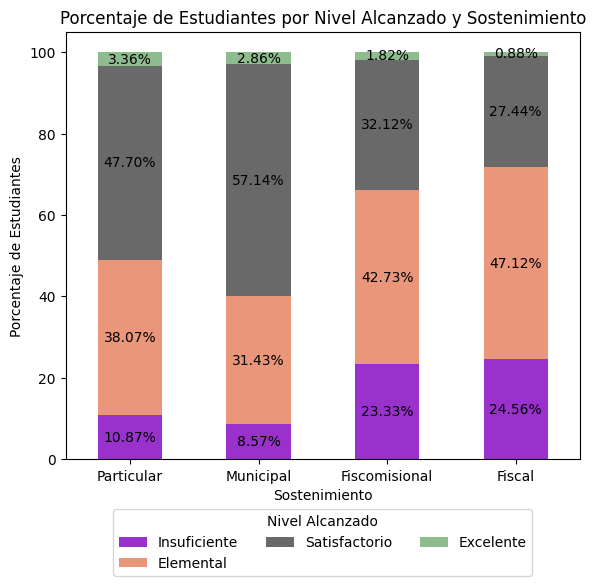

In [35]:
# Contar el número de estudiantes por 'sostenimiento' y 'nivel_alcanzado'
counts = df_inst_18.groupby(['tipo_finan', 'nivel_alcanzado']).size().unstack(fill_value=0)

percentages = counts.div(counts.sum(axis=1), axis=0) * 100

# Crear el gráfico de barras apiladas
ax = percentages.plot(kind='bar', stacked=True, figsize=(6, 6), color=['darkorchid', 'darksalmon', 'dimgray','darkseagreen'])

# Añadir etiquetas y título
plt.xlabel('Sostenimiento')
plt.ylabel('Porcentaje de Estudiantes')
plt.title('Porcentaje de Estudiantes por Nivel Alcanzado y Sostenimiento')
plt.xticks(rotation=0)  # Rotar las etiquetas del eje x si es necesario

# Añadir etiquetas de porcentaje en el centro de las barras
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f%%', label_type='center')

# Colocar la leyenda debajo del gráfico
plt.legend(title='Nivel Alcanzado', loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=3)

# Ajustar el diseño para que no se corten los elementos
plt.tight_layout()

# Mostrar el gráfico
plt.show()

# Mostrar el gráfico
plt.show()

In [45]:
df_ineval['sostenimiento'] = df_ineval['tp_sost'].map({
    1: 'particular',
    2: 'municipal',
    3: 'fiscomisional',
    4: 'fiscal'
})

C:\Users\nicole.gaibor\AppData\Local\Temp\ipykernel_5856\770197593.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ineval['sostenimiento'] = df_ineval['tp_sost'].map({


In [ ]:
#Agrupacion por institucion y notas de evaluacion
df_notas = df_ineval.groupby(['amie','sostenimiento'])[['inev','isec','pes']].mean().reset_index()
df_notas['nota_inev'] = df_notas['pes']/100
df_notas = df_notas.dropna()
df_notas

C:\Users\nicole.gaibor\AppData\Local\Temp\ipykernel_5856\1626008626.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_notas = df_ineval.groupby(['amie','sostenimiento'])[['inev','isec','pes']].mean().reset_index()


,amie,sostenimiento,inev,isec,pes,nota_inev
3,01B00020,fiscal,7.255000,-0.352787,622.750000,6.227500
4,01B00030,particular,8.680606,0.769018,790.090909,7.900909
11,01B00051,fiscal,7.810000,-0.661995,659.500000,6.595000
15,01B00052,fiscal,7.954000,-1.033775,721.600000,7.216000
19,01B00054,fiscal,7.360714,-0.428774,642.142857,6.421429
...,...,...,...,...,...,...
14584,24H00372,particular,7.406500,0.263214,650.800000,6.508000
14588,24H00383,particular,8.661250,0.768499,814.000000,8.140000
14592,24H00396,particular,7.989074,-0.663725,722.722222,7.227222
14599,24H00413,fiscal,7.278205,-0.771795,645.846154,6.458462


In [52]:
import plotly.express as px

colores = {'Público':'darkorchid','Privado':'darksalmon','Mixto':'dimgray'}

df_notas['id_inst'] = 1

# Crear un gráfico de burbujas
fig = px.scatter(df_notas, x='isec', y='inev',
                 size='id_inst', size_max=10,
                 color='sostenimiento',color_discrete_map=colores,
                 text='id_inst', 
                 title='Gráfico de Burbujas: Índice Socioeconómico vs Promedio de Nota de Evaluación',
                 labels={'nota_inev': 'Promedio de Nota Ser Bachiller',
                         'isec': 'Índice socioeconómico',
                         'id_inst': 'Instituciones'})

# Actualizar la apariencia de las etiquetas
fig.update_traces(textposition='middle center')

# Actualizar la apariencia del gráfico
fig.update_layout(
    title=dict(text='Gráfico de Burbujas: Índice Socioeconómico vs Promedio de Nota de Evaluación', font=dict(color='black')),
    xaxis=dict(title=dict(text='Índice socioeconómico', font=dict(color='black'))),
    yaxis=dict(title=dict(text='Promedio de Nota Ser Bachiller', font=dict(color='black'))),
    legend_title=dict(text='Tipo de Financiamiento', font=dict(color='black')),
    legend=dict(
        orientation="h",  # Orientación horizontal
        yanchor="top",  # Anclaje en la parte superior de la leyenda
        y=-0.3,  # Desplazamiento vertical (ajustado para evitar superposición)
        xanchor="center",  # Anclaje horizontal en el centro
        x=0.5  # Desplazamiento horizontal
    ),
    margin=dict(b=100)  # Margen inferior ajustado para evitar superposición
)

# Mostrar el gráfico
fig.show()